###Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.



In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS = StandardScaler()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y = pd.DataFrame(boston['target'], columns=['price'])

In [ ]:
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [ ]:
x_train_scaled = pd.DataFrame(SS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(SS.transform(x_test), columns=x_test.columns)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [ ]:
x_train_tsne = tsne.fit_transform(x_train_scaled)

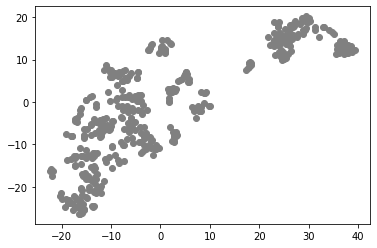

In [ ]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=['grey'])
plt.show()

##Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [ ]:
train_lables = model.fit_predict(x_train_tsne)

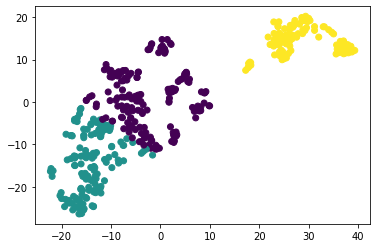

In [ ]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=train_lables)

In [ ]:
print(y_train[train_lables == 0].mean())
print(y_train[train_lables == 1].mean())
print(y_train[train_lables == 2].mean())

price    23.670659
dtype: float64
price    26.564706
dtype: float64
price    16.277228
dtype: float64


In [ ]:
print(x_train.loc[train_lables == 0, 'CRIM'].mean())
print(x_train.loc[train_lables == 1, 'CRIM'].mean())
print(x_train.loc[train_lables == 2, 'CRIM'].mean())

0.6829679640718564
0.09462279411764711
13.17982178217822


##Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [ ]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [ ]:
x_test_tsne = tsne.fit_transform(x_test_scaled)

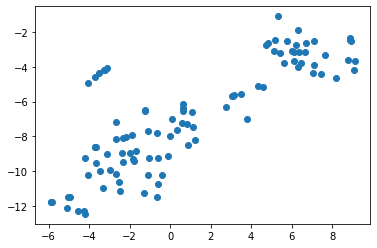

In [ ]:
plt.scatter(x_test_tsne[:,0],x_test_tsne[:,1])

In [ ]:
test_labels = model.predict(x_test_tsne)

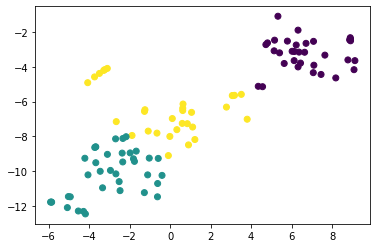

In [ ]:
plt.scatter(x_test_tsne[:,0], x_test_tsne[:,1], c=test_labels)

In [ ]:
print(y_test[test_labels == 0].mean())
print(y_test[test_labels == 1].mean())
print(y_test[test_labels == 2].mean())

price    16.421212
dtype: float64
price    26.910526
dtype: float64
price    20.235484
dtype: float64


In [ ]:
print(x_test.loc[test_labels == 0, 'CRIM'].mean())
print(x_test.loc[test_labels == 1, 'CRIM'].mean())
print(x_test.loc[test_labels == 2, 'CRIM'].mean())

10.707682121212121
0.10555710526315791
0.41909322580645153
